In [1]:
import pandas as pd
import pickle
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor 

In [2]:
data=pd.read_csv('quikr_car.csv')
data.head()

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000",Diesel


In [4]:
data.shape

(892, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name of car   892 non-null    object
 1   Company name  892 non-null    object
 2   Year          892 non-null    object
 3   Price         892 non-null    object
 4   Kms driven    840 non-null    object
 5   Fuel_type     837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
data.isnull().sum()


Name of car      0
Company name     0
Year             0
Price            0
Kms driven      52
Fuel_type       55
dtype: int64

In [10]:
data=data[data['Year'].str.isnumeric()]

In [11]:
data['Year']=data['Year'].astype(int)

In [12]:
data=data[data['Price']!="Ask For Price"]

In [13]:
data['Price']=data['Price'].str.replace(',','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [14]:
data['Kms driven']=data['Kms driven'].str.split(' ').str.get(0).str.replace(',','')

In [15]:
data=data[data['Kms driven'].str.isnumeric()]

In [16]:
data['Kms driven']=data['Kms driven'].astype(int)

In [17]:
data=data[~data['Fuel_type'].isna()]

In [18]:
data['Name of car']=data['Name of car'].str.split(' ').str.slice(0,3).str.join(' ')

In [19]:
data=data[data['Price']<6000000].reset_index(drop=True)

In [20]:
data.to_csv('Cleanedcar data.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name of car   815 non-null    object
 1   Company name  815 non-null    object
 2   Year          815 non-null    int64 
 3   Price         815 non-null    int64 
 4   Kms driven    815 non-null    int64 
 5   Fuel_type     815 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [22]:
data.describe(include="all")

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
count,815,815,815.000000,8.150000e+02,815.000000,815
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.442945,4.017933e+05,46277.096933,NaN
std,NaN,NaN,4.005079,3.815888e+05,34318.459638,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.900000e+05,56879.000000,NaN


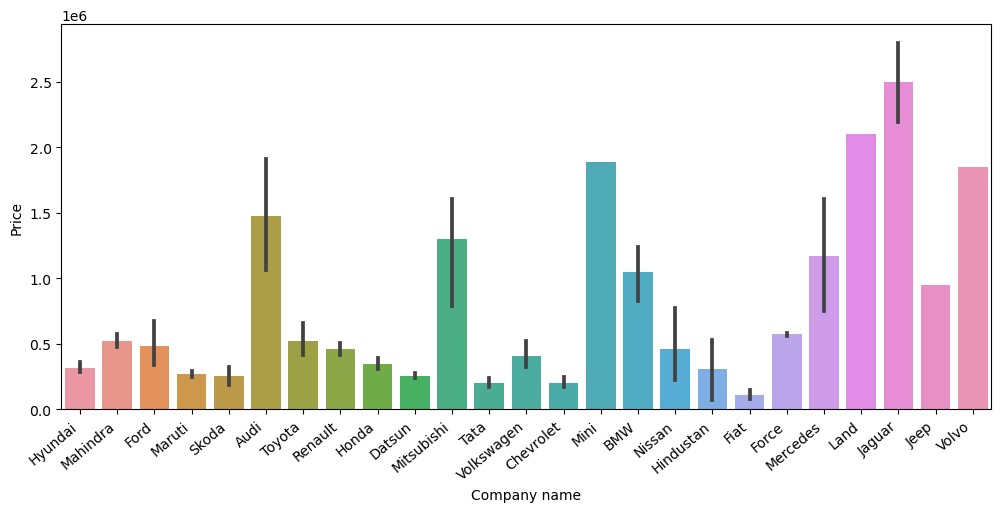

In [23]:
## Relationshio of company with Price

import matplotlib.pyplot as plt
plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Company name',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

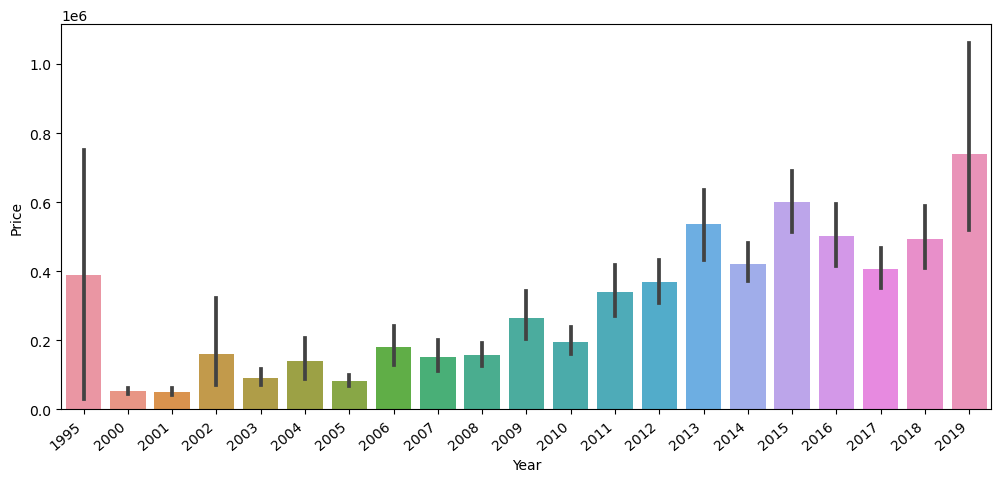

In [24]:
## Relationship of year with Price

plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Year',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


In [25]:
## Relationship of kms_driven with price

sns.relplot(x='Kms driven',y='Price',data=data,height=5,aspect=1.5)

<AxesSubplot:xlabel='Fuel_type', ylabel='Price'>

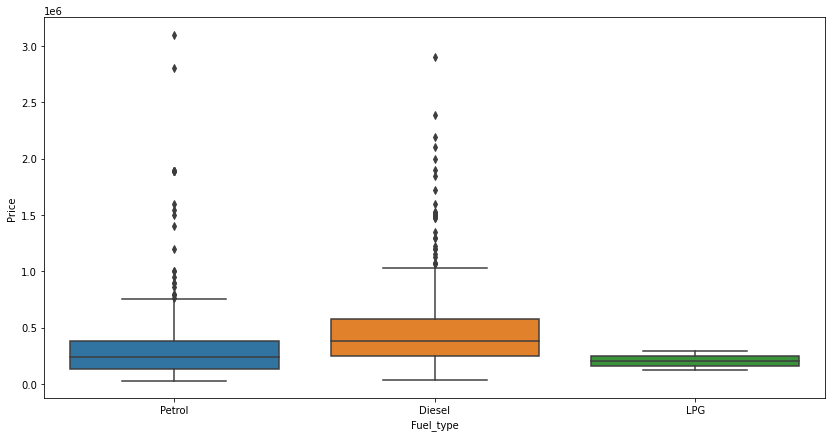

In [22]:
## relationship of fuel type with price

plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_type',y='Price',data=data)

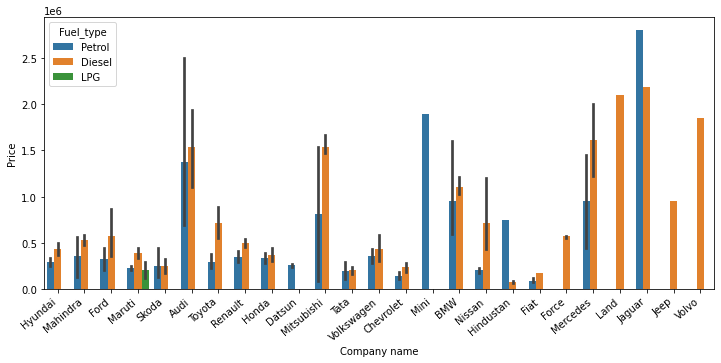

In [23]:
##Relationship of price with year and company 

plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Company name',y='Price',data=data,hue='Fuel_type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


In [26]:
X=data[['Name of car','Company name','Year','Kms driven','Fuel_type']]
y=data['Price']

In [27]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [26]:
# x=data.drop(['Price'],axis=1)
# y=data['Price']

In [28]:
ohn=OneHotEncoder()
ohn.fit(X[['Name of car','Company name','Fuel_type']])

OneHotEncoder()

In [29]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohn.categories_),['Name of car','Company name','Fuel_type']),remainder="passthrough")

In [30]:
lin_reg_model=LinearRegression()
pipe=make_pipeline(column_trans,lin_reg_model)

In [31]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [32]:
y_pred=pipe.predict(x_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6691562168490146

In [34]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lin_reg_model=LinearRegression()
    pipe=make_pipeline(column_trans,lin_reg_model)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
lin_reg_model=LinearRegression()
pipe=make_pipeline(column_trans,lin_reg_model)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.6352311333149598

In [35]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [36]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['Name of car','Company name','Year','Kms driven','Fuel_type']))

array([406922.49647768])

In [37]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [37]:
from sklearn.model_selection import cross_val_score

lin_reg_model = LinearRegression()
pipe = make_pipeline(column_trans, lin_reg_model)

scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
average_r2_score = np.mean(scores)
np.mean(scores)

0.6341717319492364